### PULSE CODE MODULATION

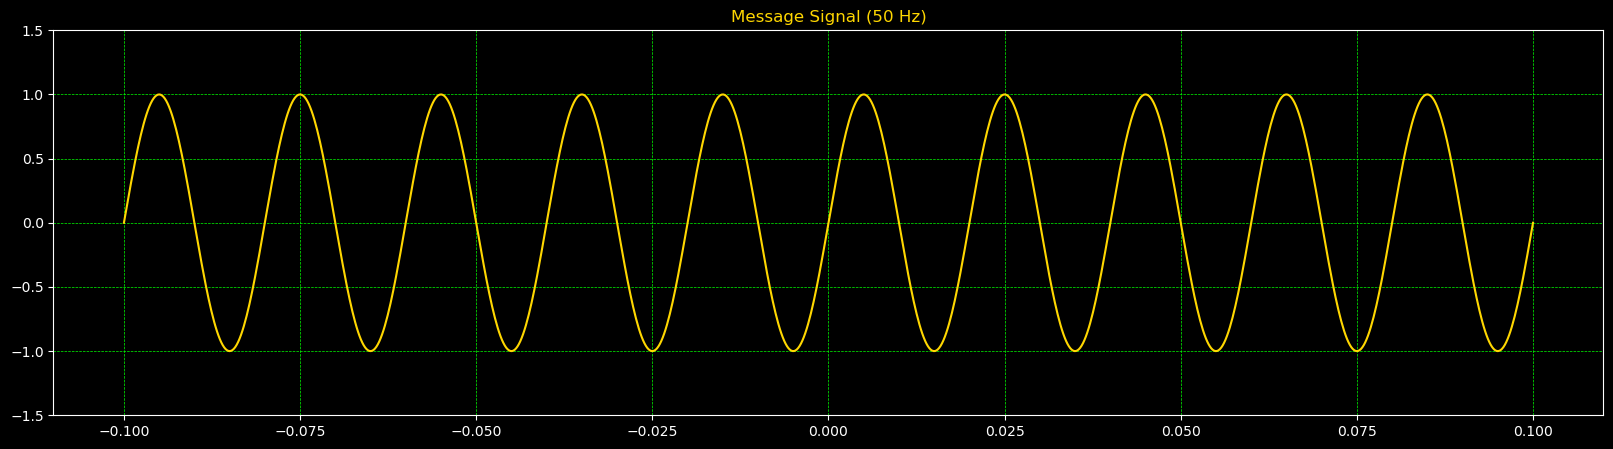

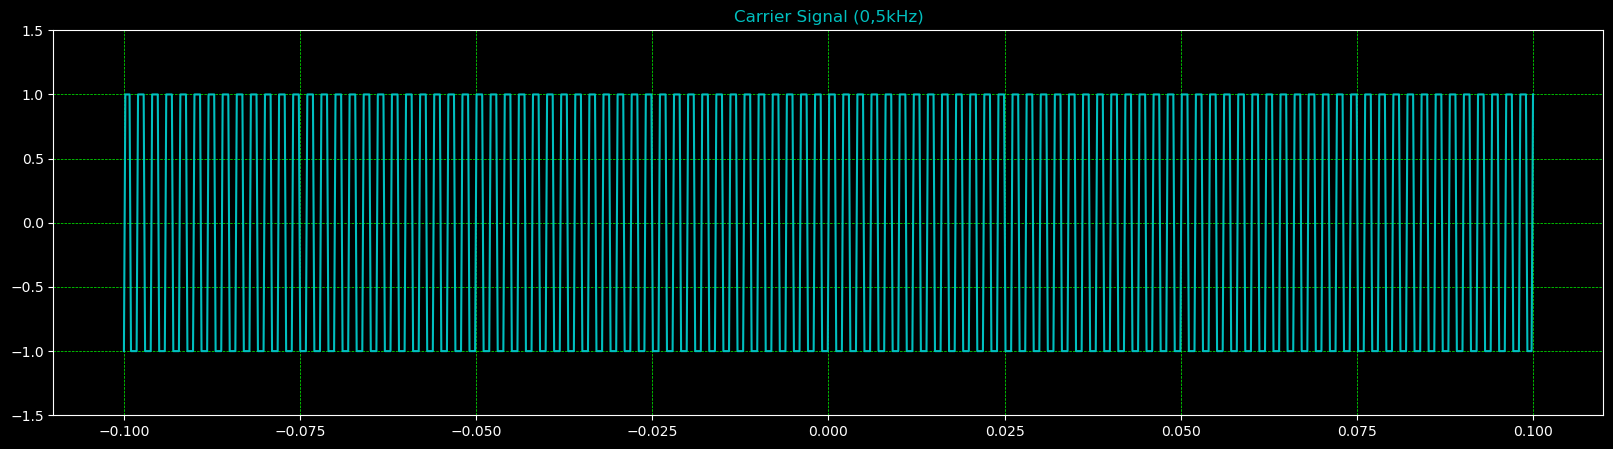

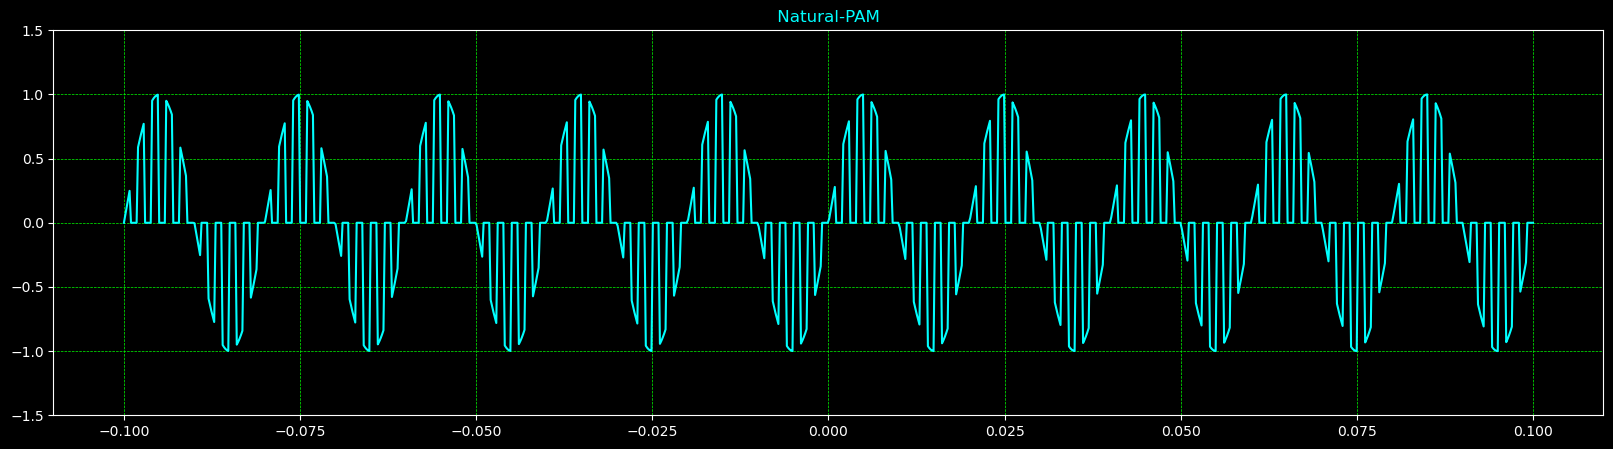

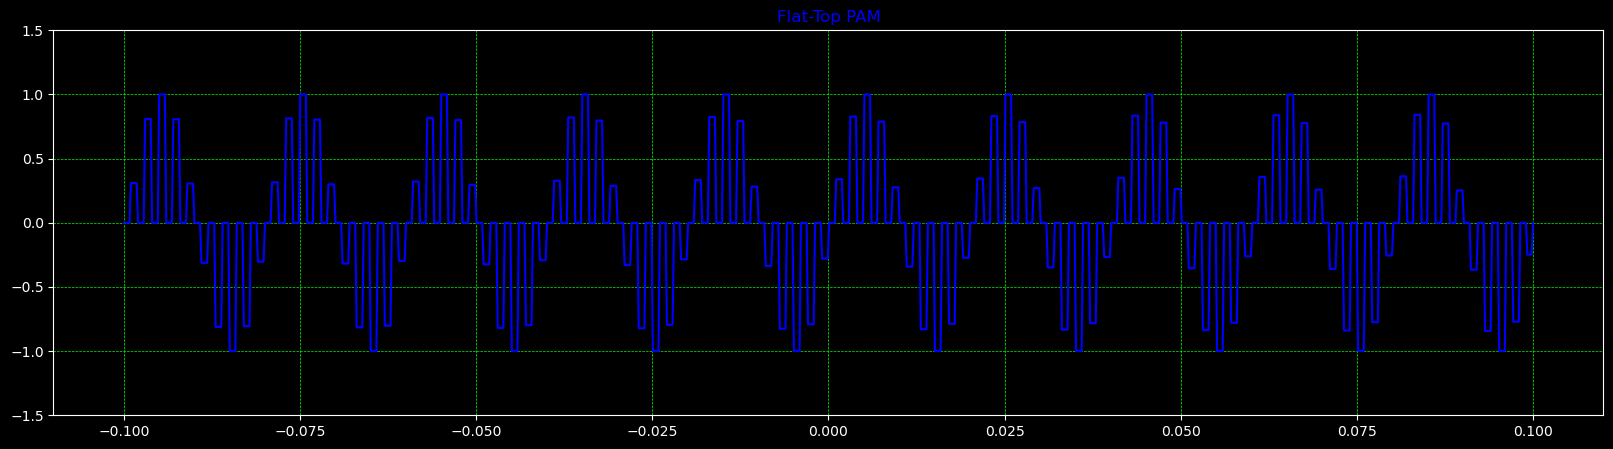

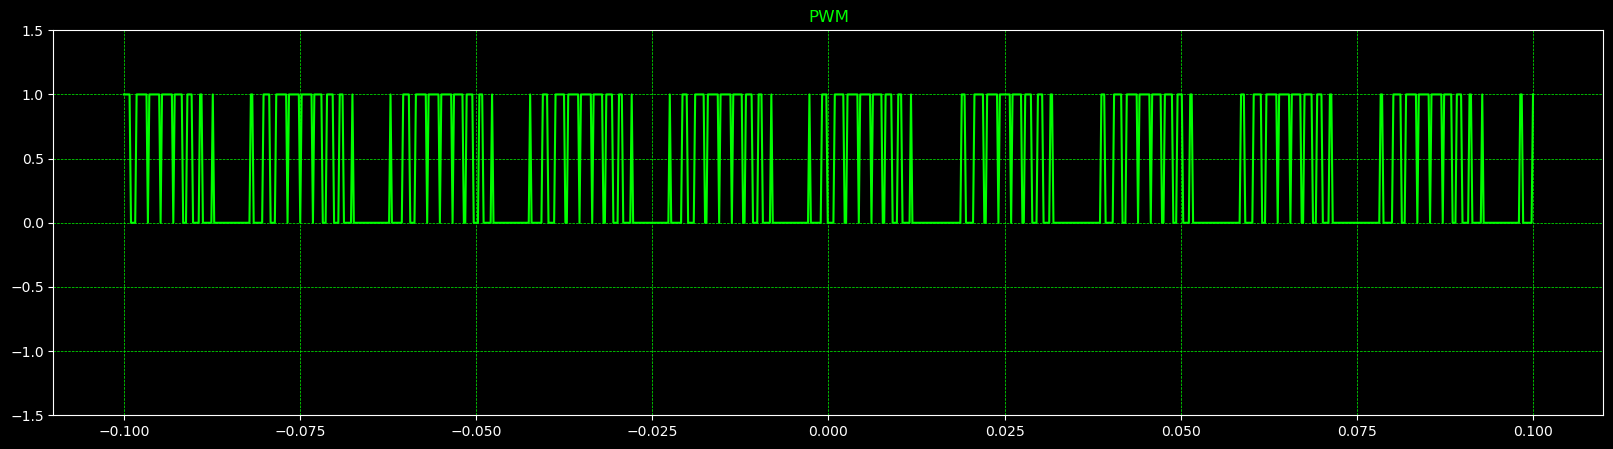

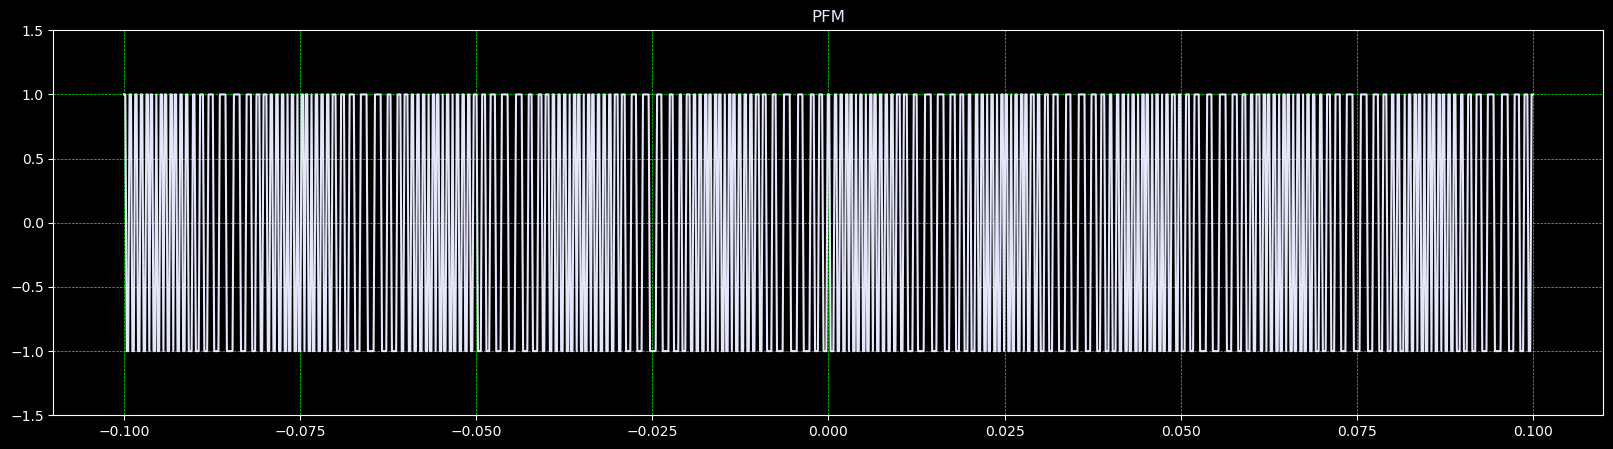

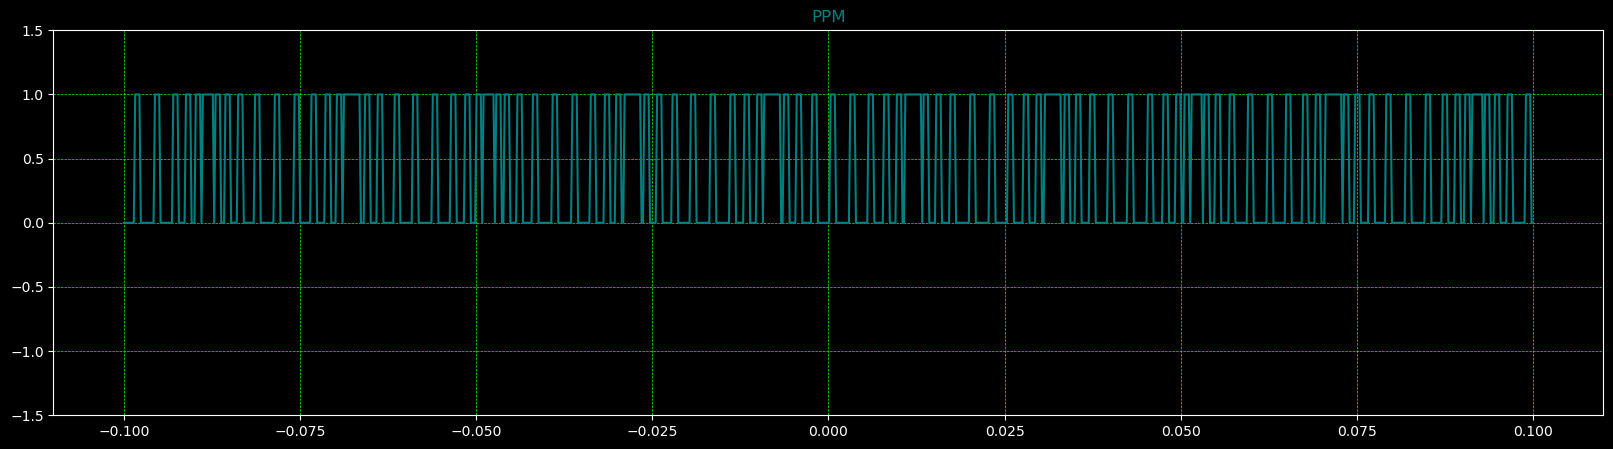

In [4]:
from numpy import * ; import matplotlib.pyplot as plt;
freq1 = 50; freq2 =500;#Hz
t = linspace(-0.1, 0.1, 1000);#s
dt = t[1] - t[0]
sampling_rate = 1 / dt
m = sin(2 * pi * freq1 * t); # msg signal
c = sign(sin(2 * pi * freq2 * t)) # carr signal 
# PAM 
### NATURAL PAM
natural_pam = m * (c > 0)
### FLAT-TOP PAM
pam_flat = zeros_like(t)
pos_pulses = (c > 0)
idx = where(diff(pos_pulses.astype(int)) != 0)[0] + 1 
edges = [0] + idx.tolist() + [len(t)]
for i in range(0, len(edges)-1, 2):
    start_idx = edges[i]
    end_idx = edges[i+1]
    pulse_val = m[start_idx]
    pam_flat[start_idx:end_idx] = pulse_val
### PWM        
def pwm(signal, freq2, sampling_rate):
    pwm_period = int(sampling_rate / freq2)
    pwm_signal = zeros_like(signal)
    for i in range(len(signal)):
        duty_cycle = (signal[i] - min(signal)) / (max(signal) - min(signal))
        high_samples = int(duty_cycle * pwm_period)
        
        if i % pwm_period < high_samples:
            pwm_signal[i] = 1
        else:
            pwm_signal[i] = 0
    return pwm_signal
### PWM
pwm_signal = pwm(m, freq2, sampling_rate)
def pfm(signal, carrier_frequency, sampling_rate):
    normalized_signal = (signal - min(signal)) / (max(signal) - min(signal))
    pfm_signal = zeros_like(signal)
    phase = 0
    for i in range(len(signal)):
        frequency = carrier_frequency + 1000 * normalized_signal[i]
        phase += 2 * pi * frequency / sampling_rate  
        pfm_signal[i] = sign(sin(phase))
    return pfm_signal
pfm_signal = pfm(m, freq2, sampling_rate)
### PPM
def ppm(signal, carrier_frequency, sampling_rate, pulse_width_samples):
    normalized_signal = 2*(signal - min(signal)) / (max(signal) - min(signal))
    ppm_signal = zeros_like(signal)
    period = int(sampling_rate / carrier_frequency)
    for i in range(len(signal)):
        if i % period == 0:
            shift = int(normalized_signal[i] * period)
            start = i + shift
            end = start + pulse_width_samples
            if end <= len(signal):
                ppm_signal[start:end] = 1
    return ppm_signal
pulse_width_samples = int(0.001 * sampling_rate)
ppm_signal = ppm(m, freq2, sampling_rate, pulse_width_samples)

l =[m,c,natural_pam, pam_flat,pwm_signal,pfm_signal,ppm_signal]; cols =['gold','c','aqua','blue','lime','lavender','teal']; titles =['Message Signal (50 Hz)','Carrier Signal (0,5kHz)', ' Natural-PAM ', 'Flat-Top PAM','PWM', 'PFM', 'PPM']
for sig,col,title in zip(l,cols,titles):
    plt.style.use('dark_background')
    plt.figure(figsize=(20,5))
    plt.title(title, color = col)
    plt.ylim(-1.5,1.5)
    plt.plot(t, sig, color =col)
    plt.grid(True, color = 'lime', linestyle= "--",linewidth=0.5 )
plt.show()